<h2> <center> AI Capstone Project
<h2> <center> Retail

### Problem Statement

 - Demand Forecast is one of the key tasks in Supply Chain and Retail Domain in general. It is key in effective operation and optimization of retail supply chain. 
 - Required to predict sales for each Store-Day level for one month. All the features will be provided and actual sales that happened during that month will also be provided for model evaluation. 

### Loading data

In [1]:
#Importing required package for data loading and EDA
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive/')

Mounted at /content/drive/


Training Data Description: 
Historic sales at Store-Day level for about two years for a retail giant, for more than 1000 stores. Also, other sale influencers like, whether on a particular day the store was fully open or closed for renovation, holiday and special event details, are also provided. 

In [13]:
original_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Capstone/retail_datasets/train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Capstone/retail_datasets/test_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
#Sample Data
original_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [15]:
#Copying the data.
train_data = original_data.copy()

In [16]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [17]:
#Size of the Data
print("Train Data Shape ", train_data.shape)
print("Test Data Shape ", test_data.shape)

Train Data Shape  (982644, 9)
Test Data Shape  (34565, 8)


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          982644 non-null  int64 
 1   DayOfWeek      982644 non-null  int64 
 2   Date           982644 non-null  object
 3   Sales          982644 non-null  int64 
 4   Customers      982644 non-null  int64 
 5   Open           982644 non-null  int64 
 6   Promo          982644 non-null  int64 
 7   StateHoliday   982644 non-null  object
 8   SchoolHoliday  982644 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 67.5+ MB


In [19]:
#Basic stats info on data
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [20]:
#check for null values
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [21]:
test_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [22]:
train_data['Date'].min()

'2013-01-01'

In [23]:
train_data['Date'].max()

'2015-06-30'

Train Dataset consists of sales data from 1115 different stores for 2.5 years.

In [24]:
#Converting dtype of Date field to datatime
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [25]:
#Year, Month, DayofMonth from Date
train_data['Month'] = train_data['Date'].apply(lambda x: x.strftime('%m'))
train_data['DayofMonth'] = train_data['Date'].apply(lambda x: x.strftime('%d'))
train_data['Year'] = train_data['Date'].apply(lambda x: x.year)

In [26]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,DayofMonth,Year
0,1,2,2015-06-30,5735,568,1,1,0,0,06,30,2015
1,2,2,2015-06-30,9863,877,1,1,0,0,06,30,2015
2,3,2,2015-06-30,13261,1072,1,1,0,1,06,30,2015
3,4,2,2015-06-30,13106,1488,1,1,0,0,06,30,2015
4,5,2,2015-06-30,6635,645,1,1,0,0,06,30,2015


## EDA

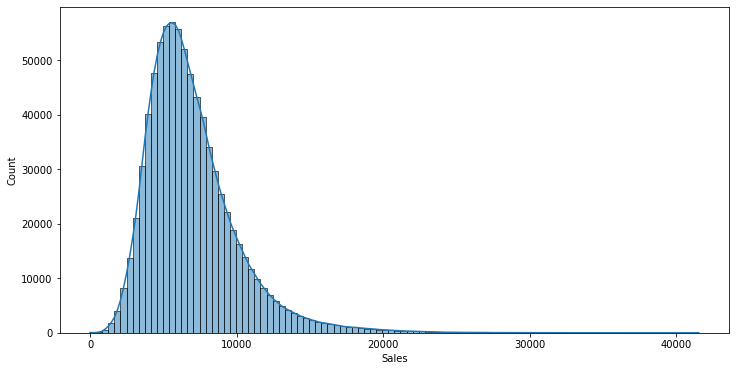

In [27]:
#Distribution of Sales for open stores
plt.figure(figsize=(12,6))
sns.histplot(x = train_data[train_data['Open'] != 0]['Sales'],bins=100,kde = True)

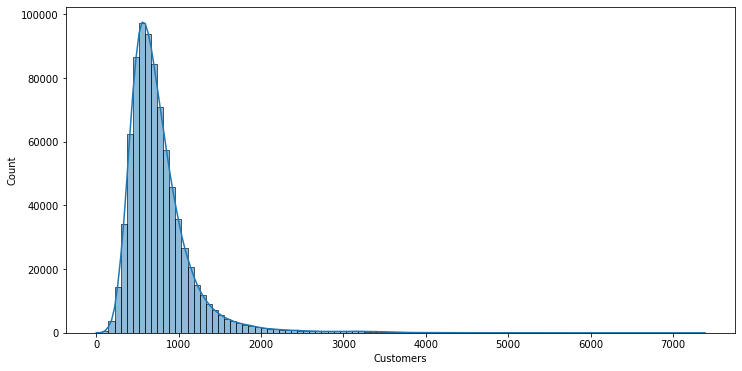

In [28]:
#Distribution of Customers for open stores
plt.figure(figsize=(12,6))
sns.histplot(x = train_data[train_data['Open'] != 0]['Customers'],bins=100,kde = True)

In [29]:
train_data['YearMonth'] = train_data['Date'].apply(lambda x: x.strftime('%Y-%m'))
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,DayofMonth,Year,YearMonth
0,1,2,2015-06-30,5735,568,1,1,0,0,06,30,2015,2015-06
1,2,2,2015-06-30,9863,877,1,1,0,0,06,30,2015,2015-06
2,3,2,2015-06-30,13261,1072,1,1,0,1,06,30,2015,2015-06
3,4,2,2015-06-30,13106,1488,1,1,0,0,06,30,2015,2015-06
4,5,2,2015-06-30,6635,645,1,1,0,0,06,30,2015,2015-06


In [30]:
#Avg Sales Monthly Trend
monthly_trend = train_data.groupby(['YearMonth']).mean().reset_index()

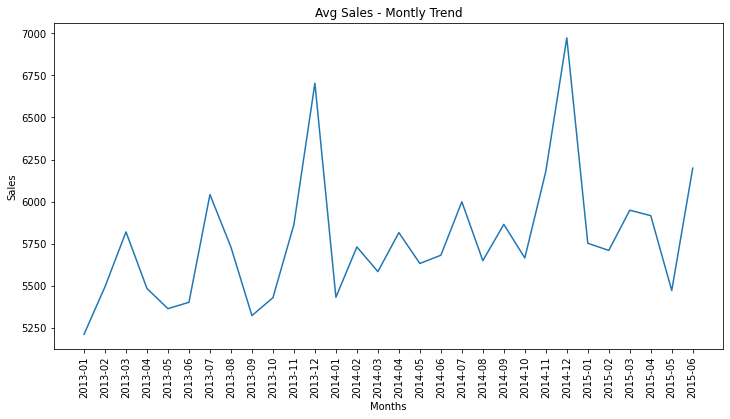

In [31]:
plt.figure(figsize=(12,6))
plt.plot(monthly_trend['YearMonth'], monthly_trend['Sales'])
plt.xticks(rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Avg Sales - Montly Trend')
plt.show()

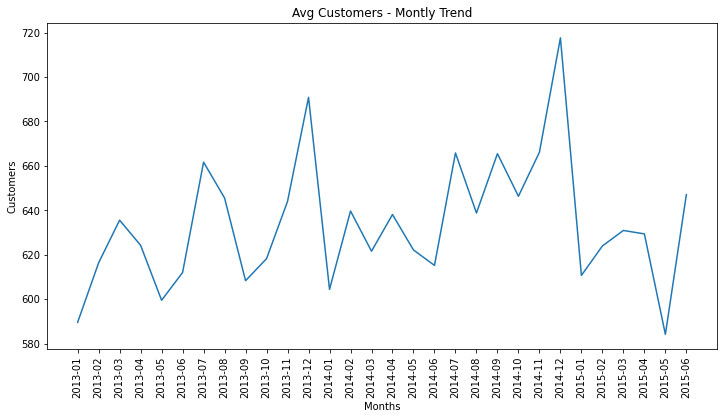

In [32]:
plt.figure(figsize=(12,6))
plt.plot(monthly_trend['YearMonth'], monthly_trend['Customers'])
plt.xticks(rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Customers')
plt.title('Avg Customers - Montly Trend')
plt.show()

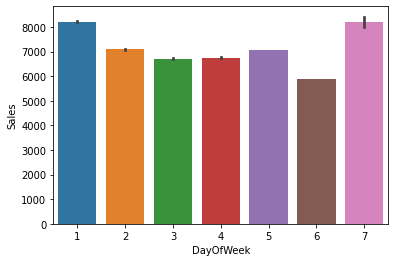

In [33]:
#Avg Sales in the week
sns.barplot(data=train_data[train_data['Open']!=0], x='DayOfWeek', y='Sales', estimator=np.mean)

From above plot, Sales during the start of the week and end of the week is high.

In [34]:
train_data['SchoolHoliday'].value_counts()

0    813700
1    168944
Name: SchoolHoliday, dtype: int64

In [35]:
#Avg sales during the school Holiday
avg_sales_scholiday = train_data.groupby('SchoolHoliday').mean().reset_index()

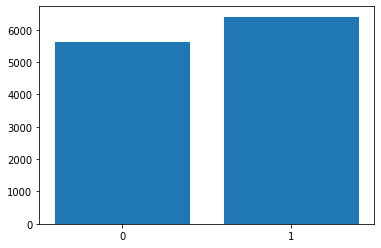

In [36]:
plt.bar(avg_sales_scholiday['SchoolHoliday'], avg_sales_scholiday['Sales'])
plt.xticks(avg_sales_scholiday['SchoolHoliday'])
plt.show()

Avg sales during schoolholiday is slightly high.

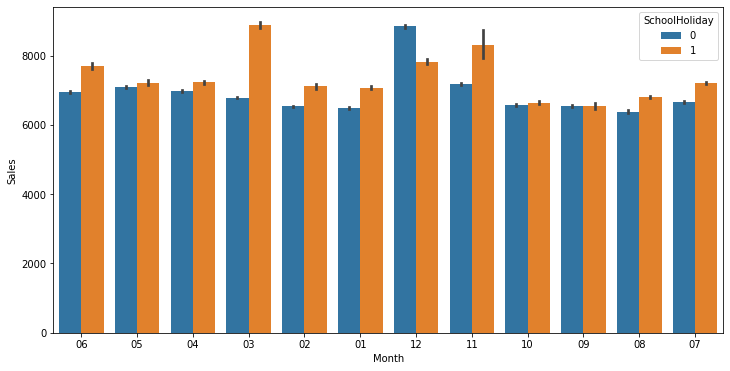

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(data=train_data[train_data['Open']!=0], x='Month', y='Sales', hue='SchoolHoliday', estimator=np.mean)

Except december, avg sales during schoolholiday is high.

In [38]:
train_data['StateHoliday'].value_counts()

0    886058
0     65536
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [39]:
#Assuming '0' (char 0) and 0 (int 0) are same i.e both represent No State Holiday. 
train_data['StateHoliday'] = train_data['StateHoliday'].astype(str)

In [40]:
train_data['StateHoliday'].value_counts()

0    951594
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [41]:
#Feature Engg. - One-hot encoding on StateHoliday
train_data = pd.concat([train_data, pd.get_dummies(train_data['StateHoliday'], prefix='StateHoliday')], axis=1)
train_data.head(3).append(train_data.tail(3))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,DayofMonth,Year,YearMonth,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2,2015-06-30,5735,568,1,1,0,0,06,30,2015,2015-06,1,0,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0,06,30,2015,2015-06,1,0,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1,06,30,2015,2015-06,1,0,0,0
982641,1113,2,2013-01-01,0,0,0,0,a,1,01,01,2013,2013-01,0,1,0,0
982642,1114,2,2013-01-01,0,0,0,0,a,1,01,01,2013,2013-01,0,1,0,0
982643,1115,2,2013-01-01,0,0,0,0,a,1,01,01,2013,2013-01,0,1,0,0


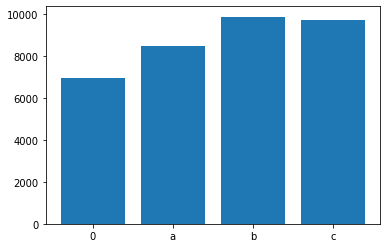

In [42]:
avg_sales_stholiday = train_data[train_data['Open']!=0].groupby('StateHoliday').mean().reset_index()

plt.bar(avg_sales_stholiday['StateHoliday'], avg_sales_stholiday['Sales'])
plt.xticks(avg_sales_stholiday['StateHoliday'])
plt.show()

Avg Sales for state Holiday b,c is high

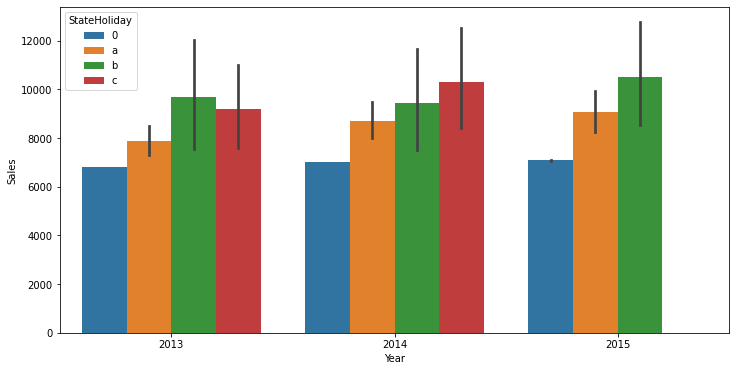

In [43]:
#Avg Sales during sate holiday in a year.
plt.figure(figsize=(12,6))
sns.barplot(data=train_data[train_data['Open']!=0], x='Year', y='Sales', hue='StateHoliday', estimator = np.mean)

In [44]:
train_data[(train_data['StateHoliday_0'] == 0) & (train_data['Open'] == 1)][['Store']].value_counts()

Store
948      32
353      32
769      29
1097     29
335      29
         ..
164       1
159       1
155       1
534       1
127       1
Length: 156, dtype: int64

In [45]:
train_data[(train_data['StateHoliday_0'] == 0) & (train_data['Open'] == 1)][['Store']].count()

Store    910
dtype: int64

There were 156 stores opened for 910 stateholiday's

In [46]:
#Avg Sales during the promotion.
avg_sales_promo = train_data[train_data['Open'] != 0].groupby('Promo').mean().reset_index()

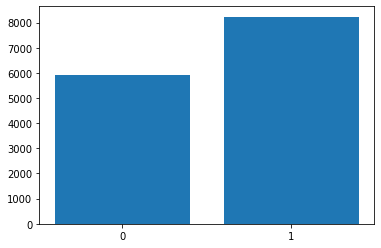

In [47]:
plt.bar(avg_sales_promo['Promo'], avg_sales_promo['Sales'])
plt.xticks(avg_sales_promo['Promo'])
plt.show()

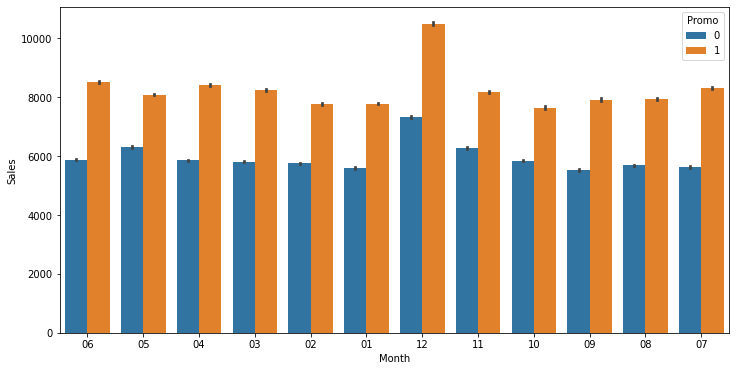

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(data=train_data[train_data['Open']!=0], x='Month', y='Sales', hue='Promo', estimator=np.mean)

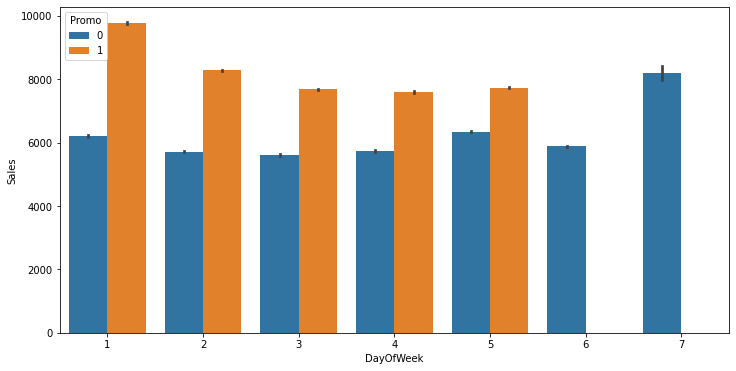

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(data=train_data[train_data['Open']!=0], x='DayOfWeek', y='Sales', hue='Promo', estimator=np.mean)

From above figure, we can see that promotions are not made during the weekends.

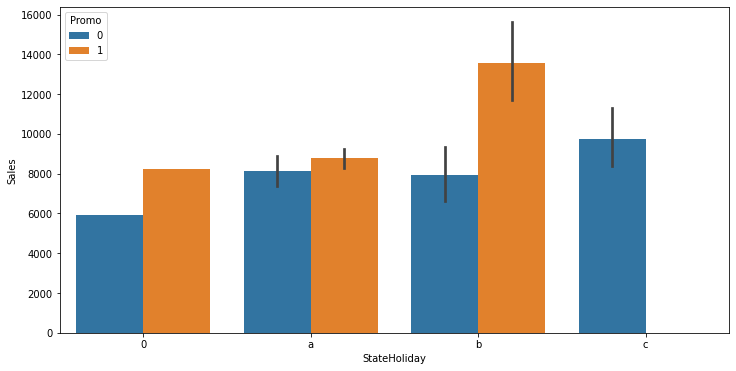

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=train_data[train_data['Open']!=0], x='StateHoliday', y='Sales', hue='Promo', estimator=np.mean)

From above figure, Promo are not made during the StateHoliday 'c'

In [51]:
#Top Stores with maximum sales till now.
store_sales = train_data.groupby('Store').sum().reset_index()

In [52]:
top_stores_sales = store_sales.sort_values('Sales', ascending=False).head(10)[['Store','Sales', 'Customers', 'Promo']]
top_stores_sales

,Store,Sales,Customers,Promo
261,262,18843209,3097778,347
816,817,16494294,2373340,347
561,562,16384004,2830106,347
1113,1114,15575997,2416494,347
250,251,14406561,1847524,347
512,513,13786765,1591474,347
732,733,13615364,3100542,347
787,788,13601720,1302593,347
382,383,13021837,1662203,347
755,756,12464405,1766710,347


In [53]:
#Top Stores with maximum Customers till now.
store_sales.sort_values('Customers', ascending=False).head(10)[['Store','Sales', 'Customers', 'Promo']]

,Store,Sales,Customers,Promo
732,733,13615364,3100542,347
261,262,18843209,3097778,347
561,562,16384004,2830106,347
768,769,9822530,2798139,347
1113,1114,15575997,2416494,347
816,817,16494294,2373340,347
1096,1097,8843969,2197684,347
334,335,12135880,2178093,347
258,259,10461487,2126156,347
250,251,14406561,1847524,347


In [54]:
#Copying the analysized data.
analysis_data = train_data.copy()

In [55]:
#As we have done one-hot encoding on the 'StateHoliday', we can drop 'StateHoliday col
train_data.drop('StateHoliday', axis=1, inplace=True)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Month,DayofMonth,Year,YearMonth,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2,2015-06-30,5735,568,1,1,0,06,30,2015,2015-06,1,0,0,0
1,2,2,2015-06-30,9863,877,1,1,0,06,30,2015,2015-06,1,0,0,0
2,3,2,2015-06-30,13261,1072,1,1,1,06,30,2015,2015-06,1,0,0,0
3,4,2,2015-06-30,13106,1488,1,1,0,06,30,2015,2015-06,1,0,0,0
4,5,2,2015-06-30,6635,645,1,1,0,06,30,2015,2015-06,1,0,0,0


In [56]:
#as we have extracted features from Data field, we can drop Data fielf.
train_data.drop('Date', axis=1, inplace=True)
train_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Month,DayofMonth,Year,YearMonth,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2,5735,568,1,1,0,06,30,2015,2015-06,1,0,0,0
1,2,2,9863,877,1,1,0,06,30,2015,2015-06,1,0,0,0
2,3,2,13261,1072,1,1,1,06,30,2015,2015-06,1,0,0,0
3,4,2,13106,1488,1,1,0,06,30,2015,2015-06,1,0,0,0
4,5,2,6635,645,1,1,0,06,30,2015,2015-06,1,0,0,0


In [57]:
#YearMonth feature was add only for analysis, so we can drop this as well
train_data.drop('YearMonth', axis=1, inplace=True)
train_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2,5735,568,1,1,0,06,30,2015,1,0,0,0
1,2,2,9863,877,1,1,0,06,30,2015,1,0,0,0
2,3,2,13261,1072,1,1,1,06,30,2015,1,0,0,0
3,4,2,13106,1488,1,1,0,06,30,2015,1,0,0,0
4,5,2,6635,645,1,1,0,06,30,2015,1,0,0,0


In [58]:
#Converting Month and DayofMonth feature to int.
train_data.Month = train_data.Month.astype('int64')
train_data.DayofMonth = train_data.DayofMonth.astype('int64')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Store           982644 non-null  int64
 1   DayOfWeek       982644 non-null  int64
 2   Sales           982644 non-null  int64
 3   Customers       982644 non-null  int64
 4   Open            982644 non-null  int64
 5   Promo           982644 non-null  int64
 6   SchoolHoliday   982644 non-null  int64
 7   Month           982644 non-null  int64
 8   DayofMonth      982644 non-null  int64
 9   Year            982644 non-null  int64
 10  StateHoliday_0  982644 non-null  uint8
 11  StateHoliday_a  982644 non-null  uint8
 12  StateHoliday_b  982644 non-null  uint8
 13  StateHoliday_c  982644 non-null  uint8
dtypes: int64(10), uint8(4)
memory usage: 78.7 MB


Now all the feature are in int format.

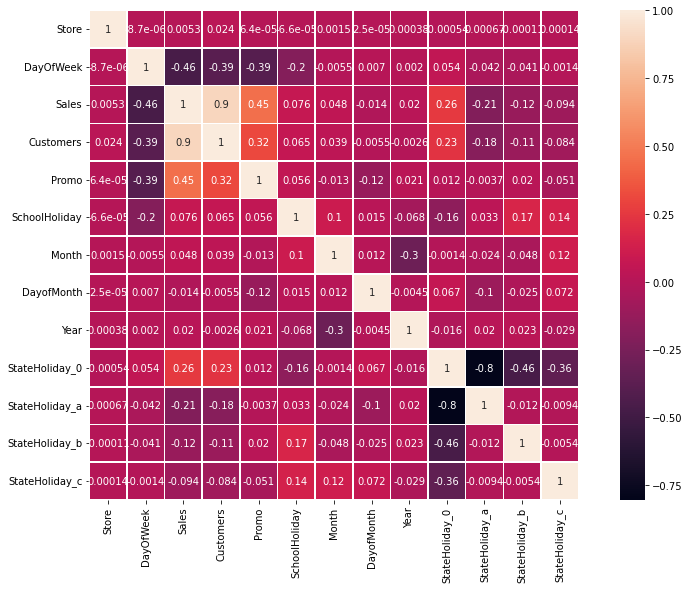

In [59]:
#correlation matrix 
corr_all = train_data.drop('Open', axis = 1).corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr_all, square = True, linewidths = .5, annot=True)      
plt.show()

In [60]:
#Features will be used for training the models
train_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Month', 'DayofMonth', 'Year', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

## Model Building/Training

In [2]:
# Importing pickle for Loading/Saving models
import pickle

#path in colab notebook
save_model_path = '/content/drive/MyDrive/Colab Notebooks/AI Capstone/retail_models/'

#path for other notebook
#save_model_path = './retail_models/'

#Saving the results of each model in dict, later all results are saved in a file.
models_results = {}

In [6]:
#Loading the preivously trained model results
import os
if os.path.exists(save_model_path+'models_rmse_results.pkl'):
    model_results_fname = open(save_model_path+'models_rmse_results.pkl', "rb")
    models_results = pickle.load(model_results_fname)
    print(models_results.keys())

dict_keys(['LinearRegression', 'LinearRegression_eachStore', 'Lasso_v1', 'LinearRegression_v2', 'XGBRegressor_v1', 'XGBRegressor_best_estimator_', 'PCA_XGBRegressor', 'ARIMA_FC', 'LSTM_Forecasting', 'XGBRegressor_Sep_Store_Cluster', 'ANNv1', 'XGBRegressor_Sep', 'ANN_Best_Estimator', 'ann_model_v2_cluster'])


## LinearRegression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [62]:
X = train_data.drop(['Sales'], axis=1)
Y = train_data['Sales']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 99) 

In [63]:
lr_single = LinearRegression()

lr_single.fit(x_train, y_train)

LinearRegression()

In [64]:
#prediction using LinearRegression model
y_pred = lr_single.predict(x_test)

### Model Evaluation: LinearRegression

In [65]:
#Model Evaluation : MAE/MSE(RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#Saving Evaluation results.
models_results['LinearRegression'] = [np.sqrt(mean_squared_error(y_test, y_pred)), mean_absolute_error(y_test, y_pred),  ]

print('LR - MAE :', models_results['LinearRegression'][1])
print('LR - RMSE :', models_results['LinearRegression'][0])

LR - MAE : 982.6866249739529
LR - RMSE : 1468.2049179921212


RSME is usually preferred as it can deal with zero and extreme (outliers) observed values,
while on the other hand, MAPE is challenged when observed values comprise zeros and
extreme values. We therefore tend to get a lower MAPE vs RSME

In [ ]:
#Saving the model
fname = save_model_path+'LinearRegression_Single_v1.pkl'
pickle.dump(lr_single, open(fname, 'wb'))

In [ ]:
#Creating the single train data to separatly train the each store.
xy_train = x_train.copy()
xy_train['Sales'] = y_train
xy_train.head()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
508761,1107,7,0,0,0,0,3,2,2014,1,0,0,0,0
811464,530,1,939,1,1,0,6,3,2013,1,0,0,0,5972
493178,19,6,410,1,0,0,3,15,2014,1,0,0,0,4538
547463,784,7,0,0,0,0,1,26,2014,1,0,0,0,0
428092,718,2,793,1,0,0,5,13,2014,1,0,0,0,6793


In [ ]:
#Creating the single train data to separatly evaluate the each store.
xy_test = x_test.copy()
xy_test['Sales'] = y_test
xy_test.head()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
631202,898,2,687,1,0,0,11,12,2013,1,0,0,0,6456
229415,580,2,2064,1,1,0,12,2,2014,1,0,0,0,15410
493967,808,6,426,1,0,0,3,15,2014,1,0,0,0,5181
981380,966,3,640,1,0,1,1,2,2013,1,0,0,0,4662
276669,65,7,0,0,0,0,10,12,2014,1,0,0,0,0


In [ ]:
#Creating the test dict to fetch test data for each Store.
test_dict = dict(list(xy_test.groupby("Store")))

test_dict[1].drop('Sales', axis=1)['Store'].nunique()

1

### Simple LinearRegression for each Store

In [ ]:
#Directory to save separate store LR models
import os
if not os.path.exists(save_model_path+'LinearRegression_Sep_models'):
  os.mkdir(save_model_path+'LinearRegression_Sep_models')

In [ ]:
#Training each Store sales with simple LinearRegression model
test_dict = dict(list(xy_test.groupby("Store")))

y_pred = []
y_true = []
store_rmse = {}

for i in test_dict.keys():
  
  lr_sep = LinearRegression()
  lr_sep.fit(xy_train.drop('Sales', axis=1)[xy_train['Store'] == i], xy_train[xy_train['Store'] == i]['Sales'])
  
  store_y_pred = lr_sep.predict(test_dict[i].drop('Sales', axis=1))
  store_y_true = test_dict[i]['Sales']
  st_rmse = np.sqrt(mean_squared_error(store_y_true, store_y_pred))
  
  print('LR for Store :',str(i),' RMSE :', str(st_rmse), '  Saving...')

  #saving each model at retails_models/LinearRegression_Separate_models
  fname = save_model_path+'LinearRegression_Sep_models/lr_store'+str(i)+'_v1.pkl'
  pickle.dump(lr_sep, open(fname, 'wb'))

  y_pred.extend(store_y_pred)
  y_true.extend(store_y_true)
  store_rmse[i] = st_rmse

print('Done')

LR for Store : 1  RMSE : 219.56269793316392   Saving...
LR for Store : 2  RMSE : 505.56889160274284   Saving...
LR for Store : 3  RMSE : 489.4143868759284   Saving...
LR for Store : 4  RMSE : 430.40829085829245   Saving...
LR for Store : 5  RMSE : 477.61363250164203   Saving...
LR for Store : 6  RMSE : 330.4634703993497   Saving...
LR for Store : 7  RMSE : 680.454269895642   Saving...
LR for Store : 8  RMSE : 407.1202292939218   Saving...
LR for Store : 9  RMSE : 368.46794983716285   Saving...
LR for Store : 10  RMSE : 311.1428440684591   Saving...
LR for Store : 11  RMSE : 660.835426619645   Saving...
LR for Store : 12  RMSE : 548.5622495923429   Saving...
LR for Store : 13  RMSE : 382.23631220073327   Saving...
LR for Store : 14  RMSE : 336.22013403340446   Saving...
LR for Store : 15  RMSE : 421.90061685998853   Saving...
LR for Store : 16  RMSE : 620.9399465209639   Saving...
LR for Store : 17  RMSE : 690.7703208122783   Saving...
LR for Store : 18  RMSE : 473.65189126389305   Savi

In [ ]:
#Saving results
models_results['LinearRegression_eachStore'] = [np.sqrt(mean_squared_error(y_true, y_pred)), sum(store_rmse.values())/len(store_rmse), store_rmse]

print('Avg of RMSE of Stores :', models_results['LinearRegression_eachStore'][1])
print('RMSE of separate Models :', models_results['LinearRegression_eachStore'][0])

Avg of RMSE of Stores : 452.20473461235525
RMSE of separate Models : 486.01163821783393


## Regularized Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_single = Lasso(alpha=0.01)
lasso_single.fit(x_train, y_train)

Lasso(alpha=0.01)

In [ ]:
y_pred = lasso_single.predict(x_test)

#Saving the results
models_results['Lasso_v1'] = [np.sqrt(mean_squared_error(y_test, y_pred))]

print('Lasso RMSE :', models_results['Lasso_v1'][0])

Lasso RMSE : 1468.204792771783


In [ ]:
#Saving the Lasso model
fname = save_model_path+'Lasso_single_v1.pkl'
pickle.dump(lasso_single, open(fname, 'wb'))

In [ ]:
#Filtering the train data, when store is closed, Sales will be also 0.
train_data = train_data[ (train_data['Open'] !=0) & (train_data['Sales'] > 0) ]

In [ ]:
#As data is filtered considering only open stores, Open feature is no longer required.
train_data.drop('Open', axis=1, inplace=True)
train_data.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2,5735,568,1,0,6,30,2015,1,0,0,0
1,2,2,9863,877,1,0,6,30,2015,1,0,0,0
2,3,2,13261,1072,1,1,6,30,2015,1,0,0,0
3,4,2,13106,1488,1,0,6,30,2015,1,0,0,0
4,5,2,6635,645,1,0,6,30,2015,1,0,0,0


In [ ]:
X = train_data.drop(['Sales'], axis=1)

#Sales Log Standardization
Y = np.log1p(train_data['Sales'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 99) 

In [ ]:
lr_single = LinearRegression()
lr_single.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_single.predict(x_test)

#Saving the results
models_results['LinearRegression_v2'] = [np.sqrt(mean_squared_error(y_test, y_pred))]

print('LR - RMSE :', models_results['LinearRegression_v2'][0])

LR - RMSE : 0.25095160243016823


In [ ]:
#Saving the model
fname = save_model_path+'LinearRegression_single_v2.pkl'
pickle.dump(lasso_single, open(fname, 'wb'))

## XGRegressor

In [ ]:
from xgboost import XGBRegressor, plot_importance

In [ ]:
xgbReg = XGBRegressor(n_estimators=500, 
                      max_depth=10,
                      subsample=0.8, 
                      colsample_bytree=0.85, 
                      learning_rate=0.1,
                      seed=99,
                      tree_method='hist'
                      )

In [ ]:
from datetime import datetime

In [ ]:
print(datetime.now())
xgbReg.fit(x_train, y_train)
print(datetime.now())

2022-01-17 08:16:04.308603
[08:16:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2022-01-17 08:18:30.259163


In [ ]:
y_pred = xgbReg.predict(x_test)

#Saving the results
models_results['XGBRegressor_v1'] = [np.sqrt(mean_squared_error(y_test, y_pred))]

print('LR - RMSE :', models_results['XGBRegressor_v1'][0])

LR - RMSE : 0.1307980346904776


In [ ]:
#Saving models
fname = save_model_path+'XGBRegressor_single_v1.pkl'
pickle.dump(lasso_single, open(fname, 'wb'))

<Figure size 864x432 with 0 Axes>

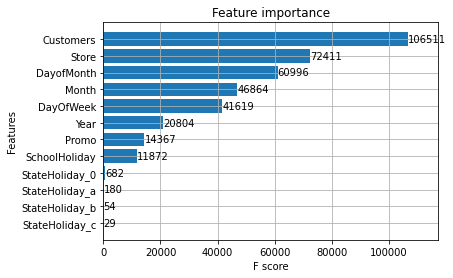

In [ ]:
#Feature Importance
plt.figure(figsize=(12,6))
plot_importance(xgbReg, max_num_features=50, height=0.8)
plt.show()

Using GridSearchCV and KFold to find best paramaters for XGBRegressor

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
y_pred = []

In [ ]:
xgbRegGridCV = XGBRegressor(silent=True, seed=99, tree_method='hist')

#parameters of XGBRegressor for GridSearchCV
param_dict = {
   'n_estimators': [300, 600],
   'eta':  [0.01,0.03], 
   'max_depth': [6,12],
   'subsample': [0.3,0.7],
   'colsample_bytree': [0.5,0.9],
   'min_child_weight':[8,12]
}


kf = KFold(n_splits=5, shuffle=False)

grid_search = GridSearchCV(xgbRegGridCV, param_dict, cv=kf, scoring='neg_root_mean_squared_error', verbose=0)


In [ ]:
#search best param only if previously not search or XGBRegressor_best_params doesn't exits.
if not os.path.exists(save_model_path+'XGBRegressor_best_params.pkl'):
  #grid search for finding best parameters
  grid_search.fit(x_train, y_train)

  xgb_best_params_fname = open(save_model_path+'XGBRegressor_best_estimator_.pkl', "wb")
  pickle.dump(grid_search.best_estimator_, xgb_best_params_fname)

  y_pred = grid_search.best_estimator_.predict(x_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(seed=99, silent=True, tree_method='hist'),
             param_grid={'colsample_bytree': [0.5, 0.9], 'eta': [0.01, 0.03],
                         'max_depth': [6, 12], 'min_child_weight': [8, 12],
                         'n_estimators': [300, 600], 'subsample': [0.3, 0.7]},
             scoring='neg_root_mean_squared_error', verbose=1)

Above grid search results took around 9hrs to complete...

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'eta': 0.01,
 'max_depth': 12,
 'min_child_weight': 12,
 'n_estimators': 300,
 'subsample': 0.7}

using above grid search results param for further model training. 

In [ ]:
#Saving best param of XGBRegressor, to avoid finding fitting GridSearchCV for nearly 9hrs.
if not save_model_path+'XGBRegressor_best_params.pkl':
  xgb_best_params_fname = open(save_model_path+'XGBRegressor_best_params.pkl', "wb")
  pickle.dump(grid_search.best_params_, xgb_best_params_fname)
else:
  # fetching the saved best param
  xgb_best_params_fname = open(save_model_path+'XGBRegressor_best_params.pkl', "rb")
  xgb_best_params = pickle.load(xgb_best_params_fname)
  print(xgb_best_params)

  print('Training model with best param')
  #train model with best param
  xgbReg_best_parma = XGBRegressor( 
                        silent=True,
                        seed=99,
                        tree_method='hist',
                        subsample=xgb_best_params['subsample'],
                        colsample_bytree=xgb_best_params['colsample_bytree'],
                        n_estimators=xgb_best_params['n_estimators'],
                        max_depth=xgb_best_params['max_depth'],
                        eta=xgb_best_params['eta'],
                        min_child_weight=xgb_best_params['min_child_weight']
                      )
  
  xgbReg_best_parma.fit(x_train, y_train)

  print('Saving model...')
  xgb_best_params_fname = open(save_model_path+'XGBRegressor_best_estimator_.pkl', "wb")
  pickle.dump(xgbReg_best_parma, xgb_best_params_fname)

  print('Predicting test data...')
  y_pred = xgbReg_best_parma.predict(x_test)

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 12, 'min_child_weight': 12, 'n_estimators': 300, 'subsample': 0.7}
Training model with best param
Saving model...
Predicting test data...


In [ ]:
#Saving the results
models_results['XGBRegressor_best_estimator_'] = [np.sqrt(mean_squared_error(y_test, y_pred))]

print('RMSE :', models_results['XGBRegressor_best_estimator_'][0])

RMSE : 0.13098246642085956


In [ ]:
#Creating the single train data to separatly train the each store.
xy_train = x_train.copy()
xy_train['Sales'] = y_train
xy_train.head()

,Store,DayOfWeek,Customers,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
447689,245,5,965,0,1,4,25,2014,1,0,0,0,8.986572
790528,779,6,271,0,0,6,22,2013,1,0,0,0,7.798523
371960,1085,4,835,1,0,7,3,2014,1,0,0,0,8.982436
610259,25,6,1649,0,0,11,30,2013,1,0,0,0,9.420844
300026,43,3,595,1,0,9,17,2014,1,0,0,0,8.836810


In [ ]:
#Creating the single test data to separatly train the each store.
xy_test = x_test.copy()
xy_test['Sales'] = y_test
xy_test.head()

,Store,DayOfWeek,Customers,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
93199,655,3,562,0,1,4,8,2015,1,0,0,0,8.700348
358868,1083,4,346,1,0,7,17,2014,1,0,0,0,8.392310
319187,593,4,1545,0,0,8,28,2014,1,0,0,0,9.229653
204465,937,1,613,0,1,12,29,2014,1,0,0,0,8.975377
686442,388,1,1310,1,0,9,23,2013,1,0,0,0,9.444780


In [ ]:
test_dict = dict(list(xy_test.groupby("Store")))


In [ ]:
if not os.path.exists(save_model_path+'XGBRegressor_Sep_models'):
  os.mkdir(save_model_path+'XGBRegressor_Sep_models')

In [ ]:
#Training for each store with best param found in grid_search
best_param = xgb_best_params

best_param['silent'] = True
best_param['seed'] = 99
best_param['tree_method'] = 'hist'

test_dict = dict(list(xy_test.groupby("Store")))

y_pred = []
y_true = []
store_rmse = {}

for i in test_dict.keys():
  
  xgbReg_sep = XGBRegressor( 
                        silent=best_param['silent'],
                        seed=best_param['seed'],
                        tree_method=best_param['tree_method'],
                        subsample=best_param['subsample'],
                        colsample_bytree=best_param['colsample_bytree'],
                        n_estimators=best_param['n_estimators'],
                        max_depth=best_param['max_depth'],
                        eta=best_param['eta'],
                        min_child_weight=best_param['min_child_weight']
                      )
    
  xgbReg_sep.fit(xy_train.drop('Sales', axis=1)[xy_train['Store'] == i], xy_train[xy_train['Store'] == i]['Sales'])
  
  store_y_pred = xgbReg_sep.predict(test_dict[i].drop('Sales', axis=1))
  store_y_true = test_dict[i]['Sales']
  st_rmse = np.sqrt(mean_squared_error(store_y_true, store_y_pred))
  
  print('XGBReg for Store :',str(i),' RMSE :', str(st_rmse))

  #saving each model at retails_models/XGBRegressor_Separate_models
  fname = save_model_path+'XGBRegressor_Sep_models/xgbr_store'+str(i)+'_v1.pkl'
  pickle.dump(xgbReg_sep, open(fname, 'wb'))

  y_pred.extend(store_y_pred)
  y_true.extend(store_y_true)
  store_rmse[i] = st_rmse

print('Done')

XGBReg for Store : 1  RMSE : 0.056798729424374986
XGBReg for Store : 2  RMSE : 0.06710211854322148
XGBReg for Store : 3  RMSE : 0.05788909792775743
XGBReg for Store : 4  RMSE : 0.039825797308617586
XGBReg for Store : 5  RMSE : 0.06656570348471064
XGBReg for Store : 6  RMSE : 0.05081261611027331
XGBReg for Store : 7  RMSE : 0.050041192652819595
XGBReg for Store : 8  RMSE : 0.06312830723773134
XGBReg for Store : 9  RMSE : 0.047479266388252075
XGBReg for Store : 10  RMSE : 0.05711130501836008
XGBReg for Store : 11  RMSE : 0.06399241951938948
XGBReg for Store : 12  RMSE : 0.05417513553748786
XGBReg for Store : 13  RMSE : 0.07875298362125727
XGBReg for Store : 14  RMSE : 0.0519215212696291
XGBReg for Store : 15  RMSE : 0.055826126221043916
XGBReg for Store : 16  RMSE : 0.059907209277862736
XGBReg for Store : 17  RMSE : 0.06025355183928032
XGBReg for Store : 18  RMSE : 0.04945390885230813
XGBReg for Store : 19  RMSE : 0.061657549556465525
XGBReg for Store : 20  RMSE : 0.059333498666732806
XG

In [ ]:
#Saving the results
models_results['XGBRegressor_Sep'] = [np.sqrt(mean_squared_error(y_true, y_pred)), sum(store_rmse.values())/len(store_rmse), store_rmse]

print('Avg of RMSE of Stores :', models_results['XGBRegressor_Sep'][1])
print('RMSE of separate Models :', models_results['XGBRegressor_Sep'][0])

Avg of RMSE of Stores : 0.0625707679173096
RMSE of separate Models : 0.06569013107262087


## PCA + XGBRegressor

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5, random_state=99)
dr_x_train = pca.fit_transform(x_train)
dr_x_test = pca.transform(x_test)

In [ ]:
#Training with best param found in grid_search
best_param = xgb_best_params

best_param['silent'] = True
best_param['seed'] = 99
best_param['tree_method'] = 'hist'

xgbReg_pca = XGBRegressor(
                        silent=best_param['silent'],
                        seed=best_param['seed'],
                        tree_method=best_param['tree_method'],
                        subsample=best_param['subsample'],
                        colsample_bytree=best_param['colsample_bytree'],
                        n_estimators=best_param['n_estimators'],
                        max_depth=best_param['max_depth'],
                        eta=best_param['eta'],
                        min_child_weight=best_param['min_child_weight']
                        )

xgbReg_pca.fit(dr_x_train, y_train)

#Saving the model
fname = save_model_path+'PCA_XGBRegressor.pkl'
pickle.dump(xgbReg_pca, open(fname, 'wb'))

In [ ]:
y_pred = xgbReg_pca.predict(dr_x_test)

#Saving the results
models_results['PCA_XGBRegressor'] = [np.sqrt(mean_squared_error(y_test, y_pred))]

print('RMSE :', models_results['PCA_XGBRegressor'][0])

RMSE : 0.15655728194229135


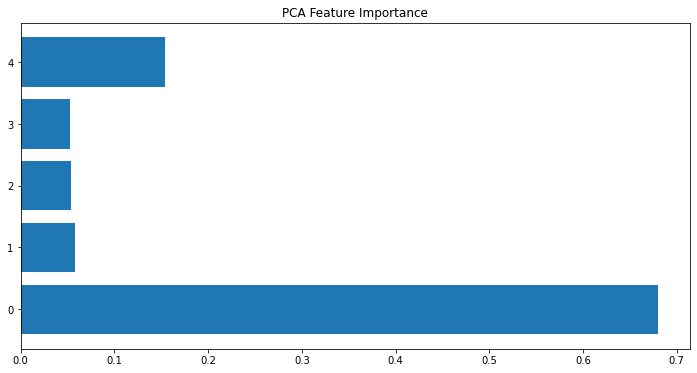

In [ ]:
plt.figure(figsize=(12,6))
plt.barh(range(len(xgbReg_pca.feature_importances_)), xgbReg_pca.feature_importances_)
plt.title('PCA Feature Importance')
plt.show()

In [ ]:
#Saving results for models trained still now
fname = save_model_path+'models_rmse_results.pkl'
pickle.dump(models_results, open(fname, 'wb'))

### Time Series analysis

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#fetching time series from original data
time_series_data = original_data[original_data['Sales'] > 0][['Date','Sales']]
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.set_index('Date', inplace=True)
time_series_data.reset_index()
time_series_data.head()

,Sales
Date,
2015-06-30,5735
2015-06-30,9863
2015-06-30,13261
2015-06-30,13106
2015-06-30,6635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


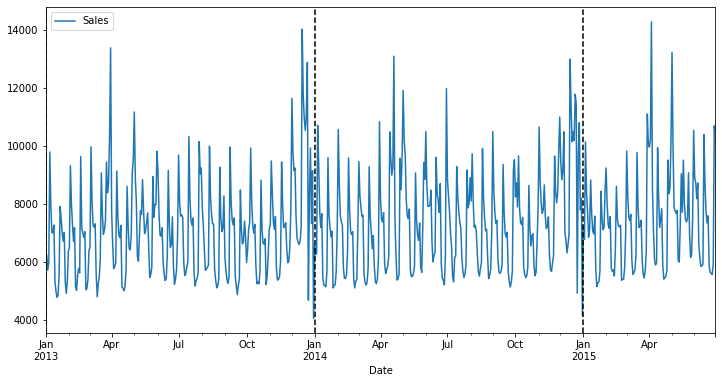

In [ ]:
ax = analysis_data[analysis_data['Sales']>0][analysis_data['DayOfWeek'] < 6][['Date','Sales']].groupby('Date').mean().reset_index().plot(x='Date', y='Sales', figsize=(12,6))

xcoords = ['2015-01-01', '2014-01-01','2013-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

In [ ]:
#sales_data = time_series_data['Sales'].copy()

In [ ]:
decompose_results = seasonal_decompose(time_series_data.groupby('Date').mean(), model='multiplicative')

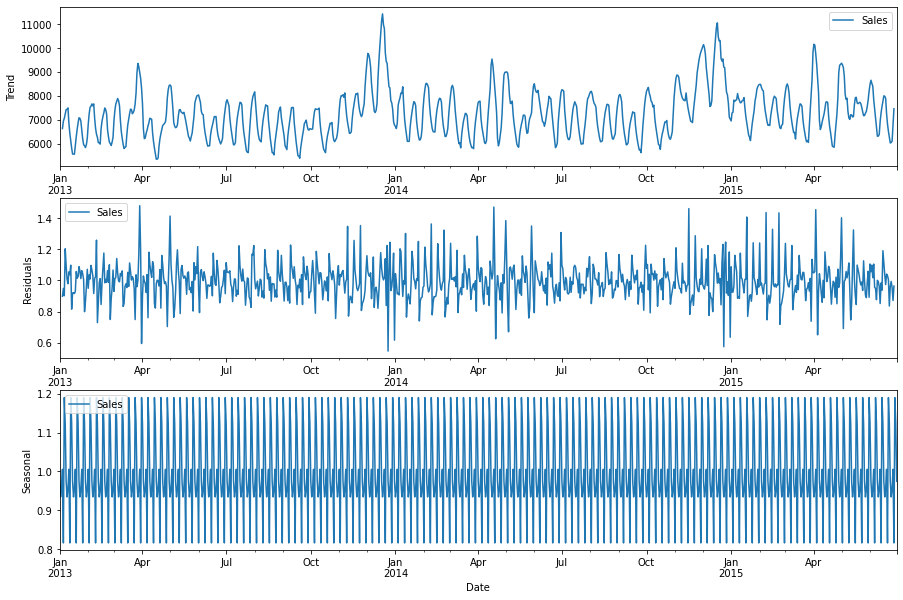

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))

ax1.set_ylabel('Trend')
decompose_results.trend.plot(ax=ax1)

ax2.set_ylabel('Residuals')
decompose_results.resid.plot(ax=ax2)

ax3.set_ylabel('Seasonal')
decompose_results.seasonal.plot(ax=ax3)
plt.show()

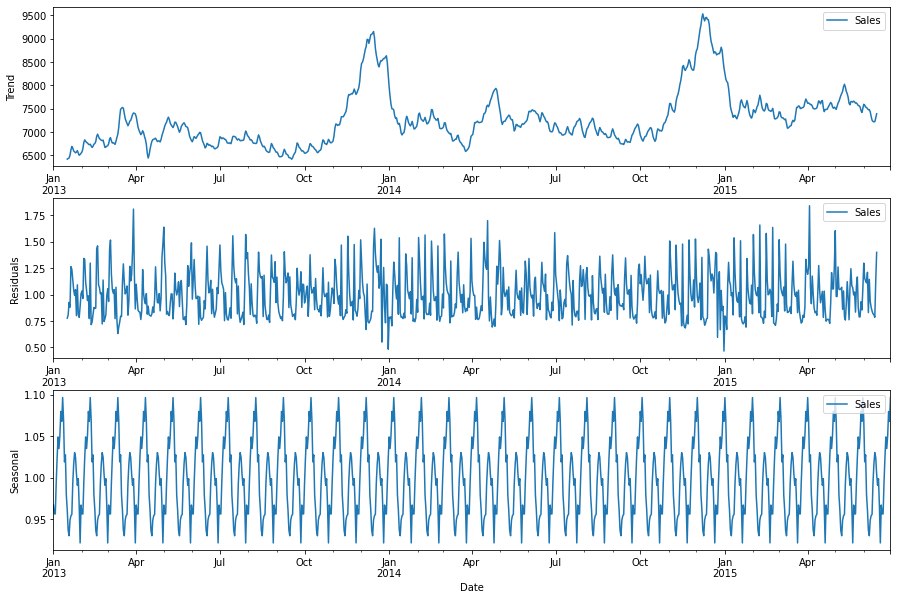

In [ ]:
decompose_results = seasonal_decompose(time_series_data.groupby('Date').mean(), model='multiplicative', freq=30)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))

ax1.set_ylabel('Trend')
decompose_results.trend.plot(ax=ax1)

ax2.set_ylabel('Residuals')
decompose_results.resid.plot(ax=ax2)

ax3.set_ylabel('Seasonal')
decompose_results.seasonal.plot(ax=ax3)
plt.show()

From above fig, Montly Seasonality is present

In [ ]:
analysis_data['YearMonth'] = pd.to_datetime(analysis_data['YearMonth'], format='%Y-%m')

In [ ]:
analysis_data['Year'] = pd.to_datetime(analysis_data['Year'], format='%Y')

In [ ]:
decompose_results = seasonal_decompose(analysis_data[['YearMonth','Sales']].groupby('YearMonth').mean(), model='multiplicative')

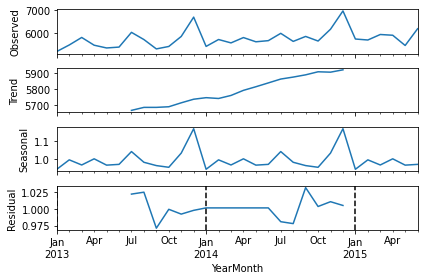

In [ ]:
decompose_results.plot()
xcoords = ['2015-01-01', '2014-01-01','2013-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
plt.show()

From this fig, yearly seasonality is present.

## ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#!pip install pmdarima
from pmdarima.arima import auto_arima

In [ ]:
#auto arima is used to find the optimal order paramters p,d,q and sesonal paramerters P,D,Q, where AIC score is less.
#Since Seasonality is present in the data, seasonal is True
auto_arima(time_series_data.groupby('Date').mean()['Sales'], 
                      seasonal=True, m=30,
                      max_p=4, max_d=4,max_q=4, 
                      max_P=4, max_D=4,max_Q=4, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=inf, Time=20.08 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=16317.523, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=16174.297, Time=1.77 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=16131.770, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=16315.530, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=16133.583, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=16133.389, Time=4.37 sec
 ARIMA(0,1,1)(0,0,2)[30] intercept   : AIC=16133.716, Time=9.93 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=16131.696, Time=1.92 sec
 ARIMA(0,1,1)(2,0,0)[30] intercept   : AIC=16133.621, Time=6.44 sec
 ARIMA(0,1,1)(2,0,1)[30] intercept   : AIC=16135.381, Time=18.99 sec
 ARIMA(0,1,0)(1,0,0)[30] intercept   : AIC=16314.301, Time=1.34 sec
 ARIMA(1,1,1)(1,0,0)[30] intercept   : AIC=inf, Time=10.66 sec
 ARIMA(0,1,2)(1,0,0)[30] intercept   : AIC=16055.494, Time=8.68 sec
 ARIMA(0,1,2)(

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  911
Model:             SARIMAX(1, 1, 4)x(1, 0, [], 30)   Log Likelihood               -8004.729
Date:                             Sun, 16 Jan 2022   AIC                          16023.459
Time:                                     07:57:21   BIC                          16057.153
Sample:                                          0   HQIC                         16036.323
                                             - 911                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6628      0.170     -3.903      0.000      -0.996      -0.330
ma.L1          0.0552      0.171      0.323      0.747      -0.280       0.390
ma.L2         -0.6293      0.116     -5.425      0.000      -0.857      -0.402
ma.L3         -0.2047      0.073     -2.812      0.005      -0.347      -0.062
ma.L4         -0.1665      0.047     -3.558      0.000      -0.258      -0.075
ar.S.L30      -0.0469      0.044     -1.068      0.286      -0.133       0.039
sigma2      2.547e+06   9.18e+04     27.743      0.000    2.37e+06    2.73e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               252.28
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_arima(time_series_data.groupby('Date').mean()['Sales'], 
                      seasonal=True, m=7,
                      max_p=4, max_d=4,max_q=4, 
                      max_P=4, max_D=4,max_Q=4, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=5.12 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=16317.523, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=15965.169, Time=1.01 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=16081.939, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=16315.530, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=16198.338, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=15585.087, Time=1.93 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=15581.177, Time=4.69 sec
 ARIMA(1,1,0)(4,0,0)[7] intercept   : AIC=15562.813, Time=7.96 sec
 ARIMA(1,1,0)(4,0,1)[7] intercept   : AIC=inf, Time=16.10 sec
 ARIMA(1,1,0)(3,0,1)[7] intercept   : AIC=inf, Time=12.14 sec
 ARIMA(0,1,0)(4,0,0)[7] intercept   : AIC=15640.014, Time=7.78 sec
 ARIMA(2,1,0)(4,0,0)[7] intercept   : AIC=15542.464, Time=12.58 sec
 ARIMA(2,1,0)(3,0,0)[7] intercept   : AIC=15559.251, Time=4.96 sec
 ARIMA(2,1,0)(4,0,1)[7] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  911
Model:             SARIMAX(2, 1, 0)x(4, 0, 0, 7)   Log Likelihood               -7763.229
Date:                           Sun, 16 Jan 2022   AIC                          15540.459
Time:                                   08:03:16   BIC                          15574.153
Sample:                                        0   HQIC                         15553.323
                                           - 911                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3545      0.021    -16.622      0.000      -0.396      -0.313
ar.L2         -0.1622      0.027     -6.047      0.000      -0.215      -0.110
ar.S.L7        0.0807      0.025      3.176      0.001       0.031       0.130
ar.S.L14       0.5078      0.024     21.192      0.000       0.461       0.555
ar.S.L21       0.0810      0.026      3.078      0.002       0.029       0.133
ar.S.L28       0.1436      0.026      5.543      0.000       0.093       0.194
sigma2      1.485e+06   4.62e+04     32.125      0.000    1.39e+06    1.58e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               509.75
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AIC score of Auto Arima for series 
7 : 15540.459
and 30 : 16023.459, So choosing the paramater of auto arima with series as 7

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

From above auto arima, best Arima model with AIC score 15540, and order paramerters are (2,1,0) and Seasonal parameter are (4, 0, 0, 7)

In [ ]:
ts_sales_data = time_series_data.groupby('Date').mean()['Sales']

arima_model = SARIMAX(ts_sales_data, order = (2,1,0), seasonal_order = (4,0,0,7))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  911
Model:             SARIMAX(2, 1, 0)x(4, 0, 0, 7)   Log Likelihood               -7763.229
Date:                           Sun, 16 Jan 2022   AIC                          15540.459
Time:                                   08:08:09   BIC                          15574.153
Sample:                               01-01-2013   HQIC                         15553.323
                                    - 06-30-2015                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3545      0.021    -16.622      0.000      -0.396      -0.313
ar.L2         -0.1622      0.027     -6.047      0.000      -0.215      -0.110
ar.S.L7        0.0807      0.025      3.176      0.001       0.031       0.130
ar.S.L14       0.5078      0.024     21.192      0.000       0.461       0.555
ar.S.L21       0.0810      0.026      3.078      0.002       0.029       0.133
ar.S.L28       0.1436      0.026      5.543      0.000       0.093       0.194
sigma2      1.485e+06   4.62e+04     32.125      0.000    1.39e+06    1.58e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               509.75
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

coef. column shows the importance (weight) of each feature and how each one impacts the time series.

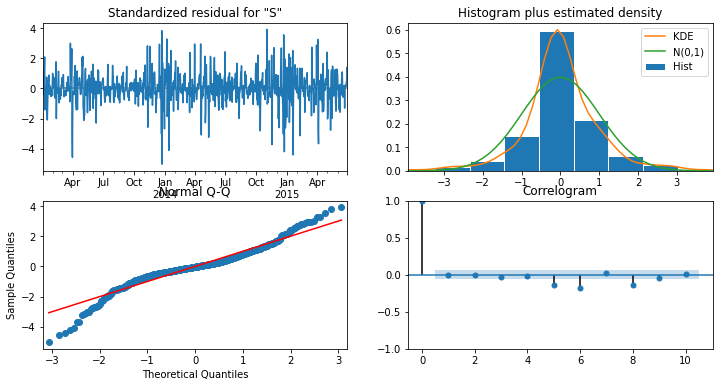

In [ ]:

arima_result.plot_diagnostics(figsize=(12,6))
plt.show()

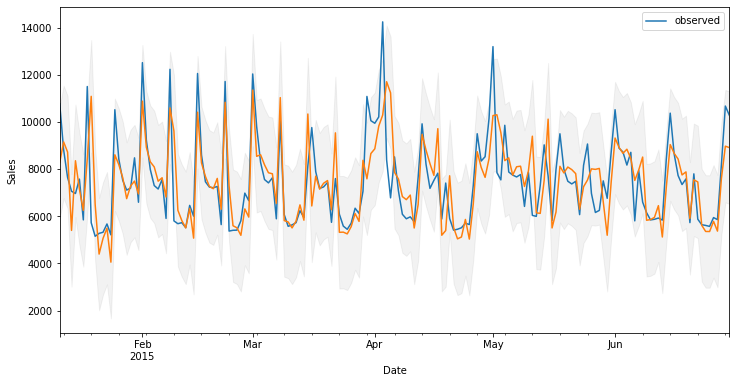

In [ ]:
#Validating arima forecast
pred = arima_result.get_prediction(start = pd.to_datetime("2015-01-11"), dynamic = False) 
pred_conf_int = pred.conf_int()

ax = ts_sales_data["2015-01-11":].plot(label = "observed", figsize=(12, 6), legend=True)
pred.predicted_mean.plot(ax = ax, alpha = 1)
ax.fill_between(pred_conf_int.index, 
                pred_conf_int.iloc[:, 0], 
                pred_conf_int.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")
plt.legend
plt.show()

In [ ]:

models_results['ARIMA_FC'] = [np.sqrt(mean_squared_error(ts_sales_data["2015-01-11":], pred.predicted_mean))]

print("ARIMA RMS:", models_results['ARIMA_FC'][0]) 

ARIMA RMS: 1303.443722159693


In [ ]:
#Saving Arima model
fname = save_model_path+'arima_forecasting.pkl'
pickle.dump(arima_result, open(fname, 'wb'))

## LSTM for TimeSeries Forecasting

In [ ]:
#Required lib.
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
#Sales for entier retail per day
ts_sales_data = time_series_data.groupby('Date').mean()['Sales']
ts_sales_data.head()

Date
2013-01-01    5719.705882
2013-01-02    6255.471647
2013-01-03    5723.913436
2013-01-04    5991.835740
2013-01-05    5376.326107
Name: Sales, dtype: float64

In [ ]:
#Train-Test split
ts_train_data = ts_sales_data[:'2015-01-11']
ts_test_data = ts_sales_data['2015-01-11':]

In [ ]:
#Normalization of the sales data
mmscaler = MinMaxScaler()

train_values = ts_train_data.values
train_values = train_values.reshape((len(train_values), 1))

test_values = ts_test_data.values
test_values = test_values.reshape((len(test_values), 1))

scaled_ts_train = mmscaler.fit_transform(train_values)
scaled_ts_test = mmscaler.transform(test_values)

In [ ]:
#converting Sales to feature and target, feature: sales in a window and target will be next that sales
def prepare_ts_data(ts_data, window):
  X, Y = [], []
  for i in range(len(ts_data)):
    end = i + window
    if end > len(ts_data)-1:
      break

    x, y = ts_data[i:end], ts_data[end]
    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)


In [ ]:
#creating the train dataset
window = 7
n_features
x_train, y_train = prepare_ts_data(scaled_ts_train, window)
x_train.shape

(734, 7, 1)

In [ ]:
#creating the sales dataset
x_test, y_test = prepare_ts_data(scaled_ts_test, window)
x_test.shape

(164, 7, 1)

In [ ]:
#LSTM model building
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(window,n_features)))
lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 7, 50)             10400     
                                                                 
 lstm_9 (LSTM)               (None, 7, 50)             20200     
                                                                 
 lstm_10 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#LSTM model training
epochs = 100
batch_size = 64
history = lstm_model.fit(x_train, y_train, 
                         validation_data=(x_test, y_test),
                         epochs=epochs,
                         batch_size=batch_size,
                         verbose=1)

Epoch 1/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0150 - val_loss: 0.0205
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0149 - val_loss: 0.0212
Epoch 3/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0155 - val_loss: 0.0237
Epoch 4/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0157 - val_loss: 0.0214
Epoch 5/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0157 - val_loss: 0.0212
Epoch 6/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0152 - val_loss: 0.0200
Epoch 7/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0145 - val_loss: 0.0202
Epoch 8/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0148 - val_loss: 0.0195
Epoch 9/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0149 - val_loss: 0.0198
Epoch 10/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0143 - val_loss: 0.0199

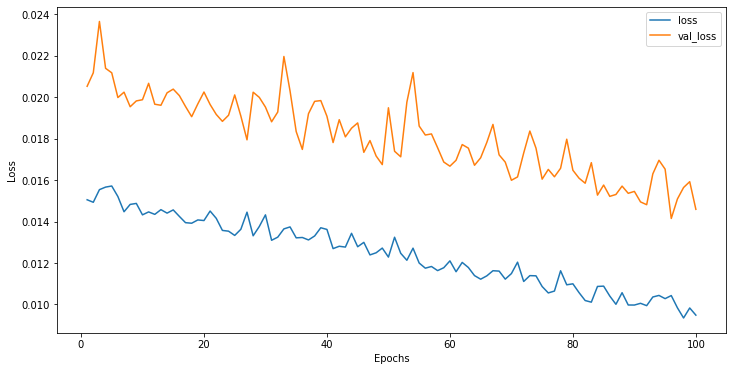

In [ ]:
#Model loss visualization
plt.figure(figsize=(12,6))
plt.plot(range(1,epochs+1), history.history['loss'], label='loss')
plt.plot(range(1,epochs+1), history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### LSTM Evaluation

In [ ]:
# train-test prediction
train_pred = lstm_model.predict(x_train)
test_pred = lstm_model.predict(x_test)

In [ ]:
#tranformation back to original form
train_pred = mmscaler.inverse_transform(train_pred)
test_pred = mmscaler.inverse_transform(test_pred)

In [ ]:
#Saving the results
models_results['LSTM_Forecasting'] = [np.sqrt(mean_squared_error(y_train,train_pred)), np.sqrt(mean_squared_error(y_test,test_pred))]

#RMSE Results
print('Train RMSE :', models_results['LSTM_Forecasting'][0])
print('Test RMSE :', models_results['LSTM_Forecasting'][1])


Train RMSE : 7321.2716013796935
Test RMSE : 7457.362736351862


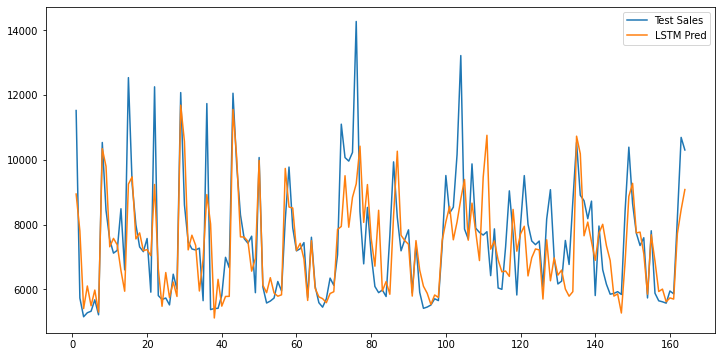

In [ ]:
#Test results visualization
plt.figure(figsize=(12,6))
plt.plot(range(1,len(y_test)+1), test_values[window:], label='Test Sales')
plt.plot(range(1,len(test_pred)+1), test_pred, label='LSTM Pred')
plt.legend()
plt.show()

In [ ]:
# Saving LSTM model
# Serialize model to JSON
with open(save_model_path+"lstm_model.json", "w") as json_file:
  json_file.write(lstm_model.to_json())

# Serialize weights to HDF5
lstm_model.save_weights(save_model_path+"lstm_model.h5")

## Results of the models built so far

In [74]:
#Models Results so far
print('Simple LinearRegression -', 'RMSE score:', models_results['LinearRegression'][0])
print('Simple LinearRegression for each store - Avg. RMSE of all the models:',models_results['LinearRegression_eachStore'][1],
      ', Combined prediction RMSE:', models_results['LinearRegression_eachStore'][0])
print('Regularized Regression - RMSE score:', models_results['Lasso_v1'][0])
print()
print('==========================================')
print('Results after Considering features only for the open stores + Log Standardization of Sales')
print('------------------------------------------')
print('LinearRegression -RMSE score:', models_results['LinearRegression_v2'][0])
print('XGBRegressor -RMSE score:', models_results['XGBRegressor_v1'][0])
print('GridSearchCV for XGBRegressor, best_estimator - RMSE score:', models_results['XGBRegressor_best_estimator_'][0])
print('XGBRegressor(best param found in GridSearchCV) - Combined prediction of all store models RMSE:', models_results['XGBRegressor_Sep_Store_Cluster'][0],
      "Avg. RMSE's of all the models:", models_results['XGBRegressor_Sep_Store_Cluster'][1])
print('PCA + XGBRegressor(with best param found in GridSearchCV) - RMSE score:', models_results['PCA_XGBRegressor'][0])
print()
print('==========================================')
print('Sales Time Series Forecasting')
print('------------------------------------------')
print('Seasonal ARIMA Forecasting RMSE:', models_results['ARIMA_FC'][0])
print('LSTM Forecasting - Train data RMSE score:', models_results['LSTM_Forecasting'][0], ' Test data RMSE score:', models_results['LSTM_Forecasting'][1])


Simple LinearRegression - RMSE score: 1468.2049179921212
Simple LinearRegression for each store - Avg. RMSE of all the models: 452.20473461235525 , Combined prediction RMSE: 486.01163821783393
Regularized Regression - RMSE score: 1468.204792771783

Results after Considering features only for the open stores + Log Standardization of Sales
------------------------------------------
LinearRegression -RMSE score: 0.25095160243016823
XGBRegressor -RMSE score: 0.1307980346904776
GridSearchCV for XGBRegressor, best_estimator - RMSE score: 0.13098246642085956
XGBRegressor(best param found in GridSearchCV) - Combined prediction of all store models RMSE: 0.1291709892962826 Avg. RMSE's of all the models: 0.12458709861495086
PCA + XGBRegressor(with best param found in GridSearchCV) - RMSE score: 0.15655728194229135

Sales Time Series Forecasting
------------------------------------------
Seasonal ARIMA Forecasting RMSE: 1303.443722159693
LSTM Forecasting - Train data RMSE score: 7321.2716013796935

From above results, XGBRegressor (with best param found in GridSearchCV) trained for each store has better RMSE than other model.

## Clustering Stores with Sales and Customers as Features 
 - Clustering used Kmeans
 - Elbow method is used to find optimal clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clustering_data = original_data[['Store', 'Sales', 'Customers']]

####Elbow Method

In [ ]:
clusters_inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=99)
  kmeans.fit(clustering_data[['Sales', 'Customers']])
  clusters_inertia.append(kmeans.inertia_)


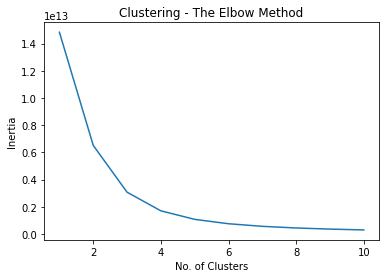

In [ ]:
plt.plot(range(1,11), clusters_inertia)
plt.title('Clustering - The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

From above chart, we can interpret that 4 is optimal number of Clusters that can we formed wit Sales and Custermers as features.

In [ ]:
train_data.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2,5735,568,1,0,6,30,2015,1,0,0,0
1,2,2,9863,877,1,0,6,30,2015,1,0,0,0
2,3,2,13261,1072,1,1,6,30,2015,1,0,0,0
3,4,2,13106,1488,1,0,6,30,2015,1,0,0,0
4,5,2,6635,645,1,0,6,30,2015,1,0,0,0


In [ ]:
#Copying train_data for using data for cluster formation
train_data_clusters = train_data.copy()

### KMeans

In [ ]:
#Kmeans for 4 clusters
n_clusters=4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=99)
kmeans.fit(train_data_clusters[['Sales', 'Customers']])

KMeans(n_clusters=4, random_state=99)

In [ ]:
train_data_clusters['Store_Cluster'] = kmeans.predict(train_data_clusters[['Sales', 'Customers']])

In [ ]:
train_data_clusters['Store_Cluster'].value_counts()

3    323490
1    307902
2    151780
0     30978
Name: Store_Cluster, dtype: int64

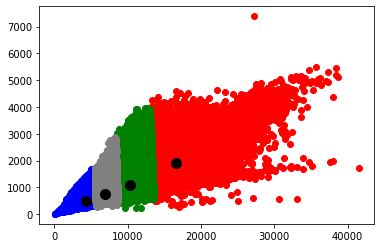

In [ ]:
#Cluster Visualization
cluster_color = ['red', 'blue', 'green', 'grey']
for i in range(n_clusters):
  X = np.array(train_data_clusters[train_data_clusters['Store_Cluster'] == i].loc[:,['Sales', 'Customers']]).reshape(-1, 2)
  plt.scatter(X[:,0], X[:,1], color=cluster_color[i])

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=100,
            c='black')
plt.show()

### Building separate prediction models for each cluster

In [ ]:
#Droping Store as we are builing model for each store cluster
train_data_clusters.drop('Store', axis=1, inplace=True)


In [ ]:
train_data_clusters.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Store_Cluster
0,2,5735,568,1,0,6,30,2015,1,0,0,0,3
1,2,9863,877,1,0,6,30,2015,1,0,0,0,2
2,2,13261,1072,1,1,6,30,2015,1,0,0,0,2
3,2,13106,1488,1,0,6,30,2015,1,0,0,0,2
4,2,6635,645,1,0,6,30,2015,1,0,0,0,3


In [ ]:
#Train-test split
x_train, x_test, y_train, y_test = train_test_split(train_data_clusters.drop('Sales', axis=1),
                                                    np.log1p(train_data_clusters['Sales']),
                                                    test_size=0.2, shuffle=True, random_state=99)

xy_train = x_train.copy()
xy_train['Sales'] = y_train
print('X Train\n',xy_train.head())

xy_test = x_test.copy()
xy_test['Sales'] = y_test
print('X Test\n',xy_test.head())


X Train
         DayOfWeek  Customers  Promo  ...  StateHoliday_c  Store_Cluster     Sales
447689          5        965      0  ...               0              3  8.986572
790528          6        271      0  ...               0              1  7.798523
371960          4        835      1  ...               0              3  8.982436
610259          6       1649      0  ...               0              2  9.420844
300026          3        595      1  ...               0              3  8.836810

[5 rows x 13 columns]
X Test
         DayOfWeek  Customers  Promo  ...  StateHoliday_c  Store_Cluster     Sales
93199           3        562      0  ...               0              3  8.700348
358868          4        346      1  ...               0              1  8.392310
319187          4       1545      0  ...               0              2  9.229653
204465          1        613      0  ...               0              3  8.975377
686442          1       1310      1  ...               0  

In [ ]:
print(dict(list(xy_test.groupby("Store_Cluster"))).keys())

dict_keys([0, 1, 2, 3])


In [ ]:
#Creating the directory to save XGBRegressor model for each cluster
if not os.path.exists(save_model_path+'XGBRegressor_Sep_Store_Cluster'):
  os.mkdir(save_model_path+'XGBRegressor_Sep_Store_Cluster')

In [ ]:
#Training for each store with best param found in grid_search for XGBRegressor
best_param = xgb_best_params

best_param['silent'] = True
best_param['seed'] = 99
best_param['tree_method'] = 'hist'

test_dict = dict(list(xy_test.groupby("Store_Cluster")))

y_pred = []
y_true = []
store_rmse = {}

for i in test_dict.keys():
  
  xgbReg_sep = XGBRegressor( 
                        silent=best_param['silent'],
                        seed=best_param['seed'],
                        tree_method=best_param['tree_method'],
                        subsample=best_param['subsample'],
                        colsample_bytree=best_param['colsample_bytree'],
                        n_estimators=best_param['n_estimators'],
                        max_depth=best_param['max_depth'],
                        eta=best_param['eta'],
                        min_child_weight=best_param['min_child_weight']
                      )
    
  xgbReg_sep.fit(xy_train.drop('Sales', axis=1)[xy_train['Store_Cluster'] == i], xy_train[xy_train['Store_Cluster'] == i]['Sales'])
  
  store_y_pred = xgbReg_sep.predict(test_dict[i].drop('Sales', axis=1))
  store_y_true = test_dict[i]['Sales']
  st_rmse = np.sqrt(mean_squared_error(store_y_true, store_y_pred))
  
  print('XGBReg for Store_Cluster :',str(i),' RMSE :', str(st_rmse))

  #Saving models for each store cluster at retail_models/XGBRegressor_Sep_Store_Cluster
  fname = save_model_path+'XGBRegressor_Sep_Store_Cluster/XGBReg_Store_Cluster_'+str(i)+'.pkl'
  pickle.dump(xgbReg_sep, open(fname, 'wb'))

  y_pred.extend(store_y_pred)
  y_true.extend(store_y_true)
  store_rmse[i] = st_rmse

print('Done')

XGBReg for Store_Cluster : 0  RMSE : 0.12777343309630645
XGBReg for Store_Cluster : 1  RMSE : 0.1573671486118741
XGBReg for Store_Cluster : 2  RMSE : 0.1053192664003051
XGBReg for Store_Cluster : 3  RMSE : 0.1078885463513178
Done


In [ ]:
#Saving the results
models_results['XGBRegressor_Sep_Store_Cluster'] = [np.sqrt(mean_squared_error(y_true, y_pred)), sum(store_rmse.values())/len(store_rmse), store_rmse]

print('Avg of RMSE of Store_Cluster :', models_results['XGBRegressor_Sep_Store_Cluster'][1])
print('RMSE of separate Models :', models_results['XGBRegressor_Sep_Store_Cluster'][0])

Avg of RMSE of Store_Cluster : 0.12458709861495086
RMSE of separate Models : 0.1291709892962826


In [ ]:
train_data_clusters.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Store_Cluster
0,2,5735,568,1,0,6,30,2015,1,0,0,0,3
1,2,9863,877,1,0,6,30,2015,1,0,0,0,2
2,2,13261,1072,1,1,6,30,2015,1,0,0,0,2
3,2,13106,1488,1,0,6,30,2015,1,0,0,0,2
4,2,6635,645,1,0,6,30,2015,1,0,0,0,3


## ANN 

In [ ]:
#Importing required lib
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
train_data.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2,5735,568,1,0,6,30,2015,1,0,0,0
1,2,2,9863,877,1,0,6,30,2015,1,0,0,0
2,3,2,13261,1072,1,1,6,30,2015,1,0,0,0
3,4,2,13106,1488,1,0,6,30,2015,1,0,0,0
4,5,2,6635,645,1,0,6,30,2015,1,0,0,0


In [ ]:
#Train-test split train_data
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(['Sales'], axis=1),
                                                    np.log1p(train_data['Sales']),
                                                    test_size=0.2, shuffle=True, random_state=99)

In [ ]:
#Standardizing the data
stdScaler = StandardScaler()

scaled_train = stdScaler.fit_transform(x_train)
scaled_test = stdScaler.transform(x_test)

In [ ]:
hidden_units1 = 120
hidden_units2 = 240
hidden_units3 = 150
learning_rate = 0.01

ann_model = Sequential([
  Dense(hidden_units1, activation='relu'),
  Dense(hidden_units2, activation='relu'), 
  Dropout(0.3),
  Dense(hidden_units3, activation='relu'),
  Dropout(0.4),
  Dense(1, activation='linear'),          
])


ann_model.compile(
    loss='mse', 
    optimizer='adam',
)


In [ ]:
epochs=50
batch_size=64

history = ann_model.fit(
            scaled_train, 
            y_train, 
            epochs=epochs, 
            batch_size=batch_size,
            validation_data=(scaled_test, y_test))

Epoch 1/50
10177/10177 [==============================] - 34s 3ms/step - loss: 0.7857 - val_loss: 0.0464
Epoch 2/50
10177/10177 [==============================] - 33s 3ms/step - loss: 0.1331 - val_loss: 0.0400
Epoch 3/50
10177/10177 [==============================] - 34s 3ms/step - loss: 0.0452 - val_loss: 0.0420
Epoch 4/50
10177/10177 [==============================] - 36s 4ms/step - loss: 0.0407 - val_loss: 0.0412
Epoch 5/50
10177/10177 [==============================] - 36s 4ms/step - loss: 0.0403 - val_loss: 0.0393
Epoch 6/50
10177/10177 [==============================] - 36s 3ms/step - loss: 0.0400 - val_loss: 0.0411
Epoch 7/50
10177/10177 [==============================] - 34s 3ms/step - loss: 0.0398 - val_loss: 0.0410
Epoch 8/50
10177/10177 [==============================] - 36s 4ms/step - loss: 0.0396 - val_loss: 0.0412
Epoch 9/50
10177/10177 [==============================] - 36s 4ms/step - loss: 0.0395 - val_loss: 0.0391
Epoch 10/50
10177/10177 [==============================

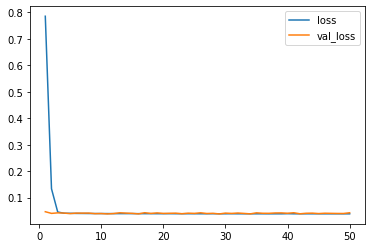

In [ ]:
#Visualization of loss and val_loss during the training
plt.plot(range(1,epochs+1), history.history['loss'], label='loss')
plt.plot(range(1,epochs+1), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
#Ann model evaluation
y_pred = ann_model.predict(x_test)

#Saving the results
models_results['ANNv1'] = [np.sqrt(mean_squared_error(y_test, y_pred))]

print('ANN RMSE:', models_results['ANNv1'][0])

ANN RMSE: 385.24363997415014


In [ ]:
# Saving ANN model
# Serialize model to JSON
with open(save_model_path+"ann_v1_model.json", "w") as json_file:
  json_file.write(ann_model.to_json())

# Serialize weights to HDF5
ann_model.save_weights(save_model_path+"ann_v1_model.h5")

#### Finding best parameters for ANN model

In [ ]:
#model creation passed to KerasRegressor
def create_model(optimizer='adam'):
  hidden_units1 = 60
  hidden_units2 = 25
  model = Sequential([
    Dense(hidden_units1, activation='relu', kernel_initializer='normal'),
    Dropout(0.3),
    Dense(hidden_units2, activation='relu', kernel_initializer='normal'),
    Dense(1),          
  ])

  model.compile(loss='mean_squared_error', optimizer=optimizer)

  return model


In [ ]:
# create model
model = KerasRegressor(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [30, 90, 180]
epochs = [10, 50]
optimizer = ['SGD', 'RMSprop', 'Adam']

param_grid = dict(batch_size=batch_size, 
                  epochs=epochs, 
                  optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=False))
grid_result = grid.fit(scaled_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.037384 using {'batch_size': 180, 'epochs': 50, 'optimizer': 'SGD'}
-0.039717 (0.001613) with: {'batch_size': 30, 'epochs': 10, 'optimizer': 'SGD'}
-0.056425 (0.005723) with: {'batch_size': 30, 'epochs': 10, 'optimizer': 'RMSprop'}
-0.053594 (0.008421) with: {'batch_size': 30, 'epochs': 10, 'optimizer': 'Adam'}
-0.042387 (0.005511) with: {'batch_size': 30, 'epochs': 50, 'optimizer': 'SGD'}
-0.058193 (0.008003) with: {'batch_size': 30, 'epochs': 50, 'optimizer': 'RMSprop'}
-0.055850 (0.005372) with: {'batch_size': 30, 'epochs': 50, 'optimizer': 'Adam'}
-0.038362 (0.000301) with: {'batch_size': 90, 'epochs': 10, 'optimizer': 'SGD'}
-0.045140 (0.003358) with: {'batch_size': 90, 'epochs': 10, 'optimizer': 'RMSprop'}
-0.046999 (0.004900) with: {'batch_size': 90, 'epochs': 10, 'optimizer': 'Adam'}
-0.038162 (0.000530) with: {'batch_size': 90, 'epochs': 50, 'optimizer': 'SGD'}
-0.054271 (0.006201) with: {'batch_size': 90, 'epochs': 50, 'optimizer': 'RMSprop'}
-0.056129 (0.007045) with

In [ ]:
#Saving the best param.
fname = open(save_model_path+'ann_model_best_param_.pkl', "wb")
pickle. dump(grid_result.best_params_, fname)
fname.close()

In [ ]:
#best esimater evaluation on the test data
y_pred = grid_result.best_estimator_.predict(scaled_test)

models_results['ANN_Best_Estimator'] = [np.sqrt(mean_squared_error(y_test, y_pred))]

print('RMSE :', models_results['ANN_Best_Estimator'][0])

RMSE : 0.19344919754254103


In [ ]:
#Saving GridSearchCV results
fname = open(save_model_path+'ann_gridsearchcv_results.pkl', "wb")
pickle. dump(grid_result.cv_results_, fname)
fname.close()

In [ ]:
# Saving best estimator ANN model
# Serialize model to JSON
with open(save_model_path+"ann_best_estimator_model.json", "w") as json_file:
  json_file.write(grid_result.best_estimator_.model.to_json())

# Serialize weights to HDF5
grid_result.best_estimator_.model.save_weights(save_model_path+"ann_best_estimator_model.h5")

#### Using best param for ANN model, we can try to train model with store clusters as one of the features.

In [ ]:
train_data_clusters.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Store_Cluster
0,2,5735,568,1,0,6,30,2015,1,0,0,0,3
1,2,9863,877,1,0,6,30,2015,1,0,0,0,2
2,2,13261,1072,1,1,6,30,2015,1,0,0,0,2
3,2,13106,1488,1,0,6,30,2015,1,0,0,0,2
4,2,6635,645,1,0,6,30,2015,1,0,0,0,3


In [ ]:
#Feature Engg. - One-hot encoding on Store_Cluster
train_data_clusters = pd.concat([train_data_clusters, pd.get_dummies(train_data_clusters['Store_Cluster'], prefix='Store_Cluster')], axis=1)
train_data_clusters.head(3).append(train_data_clusters.tail(3))

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Month,DayofMonth,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Store_Cluster,Store_Cluster_0,Store_Cluster_1,Store_Cluster_2,Store_Cluster_3
0,2,5735,568,1,0,6,30,2015,1,0,0,0,3,0,0,0,1
1,2,9863,877,1,0,6,30,2015,1,0,0,0,2,0,0,1,0
2,2,13261,1072,1,1,6,30,2015,1,0,0,0,2,0,0,1,0
982298,2,5035,1248,0,1,1,1,2013,0,1,0,0,1,0,1,0,0
982477,2,4491,1039,0,1,1,1,2013,0,1,0,0,1,0,1,0,0
982625,2,5961,1405,0,1,1,1,2013,0,1,0,0,3,0,0,0,1


In [ ]:
#Train-test split train_data
x_train, x_test, y_train, y_test = train_test_split(train_data_clusters.drop(['Sales', 'Store_Cluster'], axis=1),
                                                    np.log1p(train_data_clusters['Sales']),
                                                    test_size=0.2, shuffle=True, random_state=99)

#Standardizing the data
stdScaler = StandardScaler()

scaled_train = stdScaler.fit_transform(x_train)
scaled_test = stdScaler.transform(x_test)

In [ ]:
#model training with best param in gridSearchCv and Store Cluster as one of the features 
ann_model_clu = create_model('SGD')

epochs=50
batch_size=180
history = ann_model_clu.fit(scaled_train, y_train, 
                  epochs=epochs, 
                  batch_size=batch_size,
                  validation_data=(scaled_test, y_test))

Epoch 1/50
3619/3619 [==============================] - 8s 2ms/step - loss: 0.2129 - val_loss: 0.0218
Epoch 2/50
3619/3619 [==============================] - 7s 2ms/step - loss: 0.0237 - val_loss: 0.0190
Epoch 3/50
3619/3619 [==============================] - 7s 2ms/step - loss: 0.0215 - val_loss: 0.0178
Epoch 4/50
3619/3619 [==============================] - 7s 2ms/step - loss: 0.0205 - val_loss: 0.0175
Epoch 5/50
3619/3619 [==============================] - 7s 2ms/step - loss: 0.0200 - val_loss: 0.0175
Epoch 6/50
3619/3619 [==============================] - 7s 2ms/step - loss: 0.0197 - val_loss: 0.0174
Epoch 7/50
3619/3619 [==============================] - 7s 2ms/step - loss: 0.0194 - val_loss: 0.0176
Epoch 8/50
3619/3619 [==============================] - 7s 2ms/step - loss: 0.0193 - val_loss: 0.0178
Epoch 9/50
3619/3619 [==============================] - 7s 2ms/step - loss: 0.0191 - val_loss: 0.0174
Epoch 10/50
3619/3619 [==============================] - 7s 2ms/step - loss: 0.019

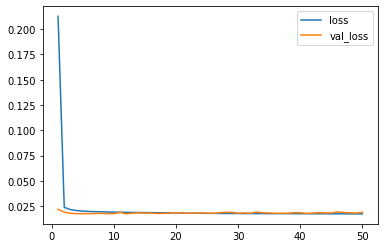

In [ ]:
#Visualization of loss and val_loss during the training
plt.plot(range(1,epochs+1), history.history['loss'], label='loss')
plt.plot(range(1,epochs+1), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
#Ann model evaluation
y_pred = ann_model_clu.predict(x_test)

#Saving the results
models_results['ann_model_v2_cluster'] = [np.sqrt(mean_squared_error(y_test, y_pred))]

print('ANN RMSE:', models_results['ann_model_v2_cluster'][0])

ANN RMSE: 20.230666792746483


In [ ]:
# Saving ANN model
# Serialize model to JSON
with open(save_model_path+"ann_model_v2_cluster.json", "w") as json_file:
  json_file.write(ann_model.to_json())

# Serialize weights to HDF5
ann_model.save_weights(save_model_path+"ann_model_v2_cluster.h5")

In [ ]:
#Saving all the models results to a file.
fname = open(save_model_path+'models_rmse_results.pkl', "wb")
pickle. dump(models_results, fname)
fname.close()